<a href="https://colab.research.google.com/github/nicollcr/Nicoll_CrespoRoncallo_KC/blob/main/Proyecto%20Final/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO FINAL DATA SCIENCE


In [2]:
import pandas as pd

#LECTURA DE DATOS

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [4]:
%cd '/content/gdrive/MyDrive/BOOTCAMP-SENA_DIGITAL-2021/PROYECTO FINAL'

/content/gdrive/MyDrive/BOOTCAMP-SENA_DIGITAL-2021/PROYECTO FINAL


In [5]:
pdf = pd.read_csv('caracterizaciondelEmpleoPublico.csv')
pdf.tail(2)

,CÓDIGO SIGEP,NOMBRE DE LA ENTIDAD,NIT,ORDEN,SUBORDEN,REGIÓN PND,CÓDIGO DIVIPOLA DEPARTAMENTO,DEPARTAMENTO,CÓDIGO DIVIPOLA MUNICIPIO,MUNICIPIO,CLASIFICACIÓN ORGÁNICA,SECTOR,NIVEL,TIPO DE VINCULACIÓN,NATURALEZA JURÍDICA,LONGITUD,LATITUD,AÑO,MES,FUENTE,GENERO: HOMBRE,GENERO: MUJER,NIVEL EDUCATIVO: PRIMARIA,NIVEL EDUCATIVO: SECUNDARIA,NIVEL EDUCATIVO: TÉCNICA-TECNOLÓGICA,NIVEL EDUCATIVO: PROFESIONAL,NIVEL EDUCATIVO: ESPECIALIZACIÓN,NIVEL EDUCATIVO: MAESTRÍA,NIVEL EDUCATIVO: DOCTORADO,NIVEL EDUCATIVO: SIN DATOS,EDAD: MENOR O IGUAL A 29,EDAD: 30-39,EDAD: 40-49,EDAD: 50-62,EDAD: 63 Y MAS,EXPERIENCIA LABORAL: MENOR A 1 AÑO,EXPERIENCIA LABORAL: DE 1 A 10 AÑOS,EXPERIENCIA LABORAL: DE 11 A 20 AÑOS,EXPERIENCIA LABORAL: DE 21 A 30 AÑOS,EXPERIENCIA LABORAL: DE 31 A 40 AÑOS,EXPERIENCIA LABORAL: MAYOR A 40 AÑOS,EXPERIENCIA LABORAL: SIN DATOS,SALARIO MENSUAL PROMEDIO
34415,5781,PERSONERÍA DE PACHO,899999475,Territorial,Municipal,CENTRO ORIENTE,25,Cundinamarca,513,PACHO,Organismos de control y vigilancia,No Aplica,No Aplica,No Aplica,Personeria Municipal,-74.152868,5.137918,2019,6,"Fuente: Función Pública, SIGEP Junio 2019",1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,2293020.50
34416,2524,CONCEJO DE SOGAMOSO,826000252-6,Territorial,Municipal,CENTRO ORIENTE,15,Boyacá,759,SOGAMOSO,Corporaciones administrativas,No Aplica,No Aplica,No Aplica,Concejo Municipal,-72.931129,5.716085,2019,3,"Fuente: Función Pública, SIGEP Marzo 2019",3,3,0,3,0,2,1,0,0,0,1,1,1,2,1,1,2,0,0,2,1,0,1955860.67


#LIMPIEZA INICIAL 

In [6]:
pdf.columns = ['codigo', 'entidad', 'nit', 'orden', 'suborden', 'region', 'cod_departamento', 'departamento', 'cod_municipio', 'municipio',
     'clasificacion', 'sector', 'nivel', 'tipo_vinculacion', 'naturaleza_juridica', 'longitud', 'latitud', 'año', 'mes', 'fuente',
     'cant_hombres', 'cant_mujeres', 'cant_primaria', 'cant_secundaria', 'cant_tecnologico', 'cant_profesional', 'cant_especializacion',
     'cant_maestria', 'cant_doctorado', 'cant_sindatos', 'menor29', '30_39', '40_49', '50_62', '63_mas', 'explaboral_1', 'explaboral_10',
     'explaboral_20', 'explaboral_30', 'explaboral_40', 'explaboral_mas40', 'explaboral_sindatos', 'salario']
pdf.head(2)

,codigo,entidad,nit,orden,suborden,region,cod_departamento,departamento,cod_municipio,municipio,clasificacion,sector,nivel,tipo_vinculacion,naturaleza_juridica,longitud,latitud,año,mes,fuente,cant_hombres,cant_mujeres,cant_primaria,cant_secundaria,cant_tecnologico,cant_profesional,cant_especializacion,cant_maestria,cant_doctorado,cant_sindatos,menor29,30_39,40_49,50_62,63_mas,explaboral_1,explaboral_10,explaboral_20,explaboral_30,explaboral_40,explaboral_mas40,explaboral_sindatos,salario
0,3629,HOSPITAL SANTO TOMAS - VILLANUEVA,800075650,Territorial,Distrital,CARIBE,44,La Guajira,874,VILLANUEVA,Ejecutiva,No Aplica,Descentralizado,Vinculación,Empresas Sociales del Estado,-72.981936,10.603721,2018,6,"Fuente: Función Pública, SIGEP junio 2018",3,0,0,0,0,1,0,0,0,2,0,0,0,3,0,3,0,0,0,0,0,0,2645764.33
1,992,ALCALDÍA DE SALDAÑA,800100140-4,Territorial,Municipal,CENTRO SUR,73,Tolima,671,SALDAÑA,Ejecutiva,No Aplica,Central,Adscripción,Alcaldía,-75.017821,3.929018,2018,12,"Fuente: Función Pública, SIGEP diciembre 2018",9,21,0,5,3,5,1,0,0,16,1,9,11,7,2,11,10,3,5,0,1,0,2072607.63


In [7]:
print ("Shape antes de cleaning: ", pdf.shape)
pdf.apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape despues de cleaning: ", pdf.shape)
pdf.head(2)

Shape antes de cleaning:  (34417, 43)
Shape despues de cleaning:  (29626, 43)


,codigo,entidad,nit,orden,suborden,region,cod_departamento,departamento,cod_municipio,municipio,clasificacion,sector,nivel,tipo_vinculacion,naturaleza_juridica,longitud,latitud,año,mes,fuente,cant_hombres,cant_mujeres,cant_primaria,cant_secundaria,cant_tecnologico,cant_profesional,cant_especializacion,cant_maestria,cant_doctorado,cant_sindatos,menor29,30_39,40_49,50_62,63_mas,explaboral_1,explaboral_10,explaboral_20,explaboral_30,explaboral_40,explaboral_mas40,explaboral_sindatos,salario
0,3629,HOSPITAL SANTO TOMAS - VILLANUEVA,800075650,Territorial,Distrital,CARIBE,44,La Guajira,874,VILLANUEVA,Ejecutiva,No Aplica,Descentralizado,Vinculación,Empresas Sociales del Estado,-72.981936,10.603721,2018,6,"Fuente: Función Pública, SIGEP junio 2018",3,0,0,0,0,1,0,0,0,2,0,0,0,3,0,3,0,0,0,0,0,0,2645764.33
1,992,ALCALDÍA DE SALDAÑA,800100140-4,Territorial,Municipal,CENTRO SUR,73,Tolima,671,SALDAÑA,Ejecutiva,No Aplica,Central,Adscripción,Alcaldía,-75.017821,3.929018,2018,12,"Fuente: Función Pública, SIGEP diciembre 2018",9,21,0,5,3,5,1,0,0,16,1,9,11,7,2,11,10,3,5,0,1,0,2072607.63


In [8]:
len(pdf.entidad.unique())

2780

In [9]:
#ADICION COLUMNA CON EL TOTAL DE PERSONAS
pdf['totalpersonas'] = pdf['cant_hombres'] + pdf['cant_mujeres']

In [10]:
#CALCULO PERCENTIL 40 PARA CANTIDAD TOTAL DE PERSONAS
import numpy as np
arraycant_personas = np.array(pdf.totalpersonas)
#print(len(arraycant_personas))
percentile = np.percentile(arraycant_personas, 40)

print("El percentil 40 is:",percentile)

El percentil 40 is: 9.0


In [11]:
filtered_pdf = pdf.query('totalpersonas > 9')
print ("Shape despues de filtrar: ", filtered_pdf.shape)
filtered_pdf.head(2)

Shape despues de filtrar:  (17532, 44)


,codigo,entidad,nit,orden,suborden,region,cod_departamento,departamento,cod_municipio,municipio,clasificacion,sector,nivel,tipo_vinculacion,naturaleza_juridica,longitud,latitud,año,mes,fuente,cant_hombres,cant_mujeres,cant_primaria,cant_secundaria,cant_tecnologico,cant_profesional,cant_especializacion,cant_maestria,cant_doctorado,cant_sindatos,menor29,30_39,40_49,50_62,63_mas,explaboral_1,explaboral_10,explaboral_20,explaboral_30,explaboral_40,explaboral_mas40,explaboral_sindatos,salario,totalpersonas
1,992,ALCALDÍA DE SALDAÑA,800100140-4,Territorial,Municipal,CENTRO SUR,73,Tolima,671,SALDAÑA,Ejecutiva,No Aplica,Central,Adscripción,Alcaldía,-75.017821,3.929018,2018,12,"Fuente: Función Pública, SIGEP diciembre 2018",9,21,0,5,3,5,1,0,0,16,1,9,11,7,2,11,10,3,5,0,1,0,2072607.63,30
3,4393,GOBERNACIÓN DE BOYACÁ,891800498-1,Territorial,Departamental,CENTRO ORIENTE,15,Boyacá,1,TUNJA,Ejecutiva,No Aplica,Central,Adscripción,Gobernación,-73.357557,5.544642,2021,6,junio 2021,193,246,4,61,28,92,199,40,1,11,3,58,81,252,45,12,62,59,159,76,71,0,4334771.62,439


In [12]:
df = pd.DataFrame(filtered_pdf)

# Agrupación y Label Encoding 

In [13]:
#LABEL ENCODING COLUMNA REGION
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.region)
#list(le.classes_)
df.region = le.transform(df.region)
df.region.value_counts()

1    6205
0    3407
5    2677
4    2533
2    1541
3    1169
Name: region, dtype: int64

In [14]:
df['nivelsecundaria'] = df['cant_primaria'] + df['cant_secundaria']
df['nivelpregrado'] = df['cant_tecnologico'] + df['cant_profesional']
df['nivelposgrado'] = df['cant_especializacion'] + df['cant_maestria'] + df['cant_doctorado']

In [15]:
df['edadmenor50'] = df['menor29'] + df['30_39'] + df['40_49']
df['edadmayor50'] = df['50_62'] + df['63_mas']

In [16]:
df['explaboralhasta30'] = df['explaboral_1'] + df['explaboral_10'] + df['explaboral_20'] + df['explaboral_30']
df['explaboralmayor30'] = df['explaboral_40'] + df['explaboral_mas40']

In [17]:
df.head(2)

,codigo,entidad,nit,orden,suborden,region,cod_departamento,departamento,cod_municipio,municipio,clasificacion,sector,nivel,tipo_vinculacion,naturaleza_juridica,longitud,latitud,año,mes,fuente,cant_hombres,cant_mujeres,cant_primaria,cant_secundaria,cant_tecnologico,cant_profesional,cant_especializacion,cant_maestria,cant_doctorado,cant_sindatos,menor29,30_39,40_49,50_62,63_mas,explaboral_1,explaboral_10,explaboral_20,explaboral_30,explaboral_40,explaboral_mas40,explaboral_sindatos,salario,totalpersonas,nivelsecundaria,nivelpregrado,nivelposgrado,edadmenor50,edadmayor50,explaboralhasta30,explaboralmayor30
1,992,ALCALDÍA DE SALDAÑA,800100140-4,Territorial,Municipal,2,73,Tolima,671,SALDAÑA,Ejecutiva,No Aplica,Central,Adscripción,Alcaldía,-75.017821,3.929018,2018,12,"Fuente: Función Pública, SIGEP diciembre 2018",9,21,0,5,3,5,1,0,0,16,1,9,11,7,2,11,10,3,5,0,1,0,2072607.63,30,5,8,1,21,9,29,1
3,4393,GOBERNACIÓN DE BOYACÁ,891800498-1,Territorial,Departamental,1,15,Boyacá,1,TUNJA,Ejecutiva,No Aplica,Central,Adscripción,Gobernación,-73.357557,5.544642,2021,6,junio 2021,193,246,4,61,28,92,199,40,1,11,3,58,81,252,45,12,62,59,159,76,71,0,4334771.62,439,65,120,240,142,297,292,147


In [18]:
df.cod_departamento.value_counts()

11    1833
25    1643
5     1612
15    1270
52    1049
68     973
76     718
13     694
73     660
23     555
19     550
8      499
17     493
54     486
20     485
70     430
50     424
27     360
47     350
44     339
41     325
86     259
18     252
85     249
81     234
66     220
63     208
95      87
99      78
97      65
88      55
91      45
94      32
Name: cod_departamento, dtype: int64

In [19]:
df.departamento.value_counts()

Bogotá D.C                                                  1833
Cundinamarca                                                1643
Antioquia                                                   1612
Boyacá                                                      1270
Nariño                                                      1049
Santander                                                    973
Valle del Cauca                                              718
Bolívar                                                      694
Tolima                                                       660
Córdoba                                                      555
Cauca                                                        550
Atlántico                                                    499
Caldas                                                       493
Norte de Santander                                           486
Cesar                                                        485
Sucre                    

# Feature Selection

In [20]:
entidades = df[['cant_hombres', 'cant_mujeres','cod_departamento','nivelsecundaria', 'nivelpregrado', 'nivelposgrado', 'edadmenor50', 'edadmayor50', 'explaboralhasta30', 'explaboralmayor30', 'salario', 'region']].groupby(by='cod_departamento').mean()
print(entidades.shape)
entidades

(33, 11)


,cant_hombres,cant_mujeres,nivelsecundaria,nivelpregrado,nivelposgrado,edadmenor50,edadmayor50,explaboralhasta30,explaboralmayor30,salario,region
cod_departamento,,,,,,,,,,,
5,43.064516,46.746278,25.395161,31.584367,22.629032,45.411911,44.395782,74.029156,15.781638,2.458650e+06,4.0
8,45.172345,47.905812,16.615230,25.587174,19.661323,46.358717,46.719439,87.378758,5.699399,2.336643e+06,0.0
11,381.274414,384.153846,224.021822,246.412439,277.561375,446.540098,318.877796,592.304965,173.123295,3.870479e+06,1.0
13,29.543228,30.824207,12.279539,15.670029,9.452450,32.351585,28.015850,56.024496,4.342939,2.050495e+06,0.0
15,13.284252,17.816535,7.810236,8.948031,8.466929,16.374016,14.726772,26.859843,4.240945,1.923741e+06,1.0
17,25.430020,26.807302,12.884381,16.628803,11.955375,26.103448,26.133874,44.555781,7.681542,2.320628e+06,4.0
18,23.492063,36.654762,15.750000,22.757937,9.535714,39.289683,20.857143,55.611111,4.535714,1.750457e+06,2.0
19,31.336364,35.183636,19.223636,15.856364,8.972727,32.865455,33.654545,60.398182,6.121818,2.021797e+06,5.0
20,19.047423,24.255670,8.505155,14.026804,8.496907,24.200000,19.103093,39.892784,3.410309,2.134137e+06,0.0


# NORMALIZACION

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(entidades))
#print(scaler.mean_)
entidadesnormal = scaler.transform(entidades)
entidadesnormal

StandardScaler()


array([[ 0.0789546 ,  0.09569532,  0.10425712,  0.16816041,  0.07156763,
         0.01571666,  0.18626467,  0.06257093,  0.16825601,  0.58088429,
         1.07211253],
       [ 0.11279944,  0.11450594, -0.12717838,  0.01749032,  0.00690152,
         0.02885974,  0.23096771,  0.20301931, -0.18016854,  0.27745752,
        -1.28653504],
       [ 5.50950039,  5.56931559,  5.33997729,  5.56537978,  5.62651965,
         5.58396847,  5.46681197,  5.51524297,  5.60570853,  4.09205494,
        -0.69687315],
       [-0.13815311, -0.1626017 , -0.24146549, -0.23166246, -0.21554888,
        -0.16557995, -0.12885618, -0.12685236, -0.2270454 , -0.43418273,
        -1.28653504],
       [-0.39921913, -0.37361966, -0.35927454, -0.40054213, -0.23702328,
        -0.38737222, -0.38451448, -0.43368761, -0.23057016, -0.7494132 ,
        -0.69687315],
       [-0.20419778, -0.22776625, -0.22552208, -0.20757475, -0.16101036,
        -0.25231332, -0.16506206, -0.24751232, -0.11166915,  0.23762983,
         1.072

# Clustering usando SCIpy

In [22]:
feature_mtx = entidadesnormal
#feature_mtx

In [23]:
import scipy
from scipy.spatial import distance
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  after removing the cwd from sys.path.


In [24]:
D

array([[ 0.        ,  2.42497992, 16.74802498, ...,  1.40501749,
         1.25931696,  1.72756347],
       [ 2.42497992,  0.        , 16.91143259, ...,  2.04075152,
         2.05823524,  2.2735259 ],
       [16.74802498, 16.91143259,  0.        , ..., 17.75012323,
        17.76318923, 18.22827802],
       ...,
       [ 1.40501749,  2.04075152, 17.75012323, ...,  0.        ,
         0.93559644,  0.6276708 ],
       [ 1.25931696,  2.05823524, 17.76318923, ...,  0.93559644,
         0.        ,  0.80401553],
       [ 1.72756347,  2.2735259 , 18.22827802, ...,  0.6276708 ,
         0.80401553,  0.        ]])

In [25]:
import pylab
import scipy.cluster
Z = scipy.cluster.hierarchy.linkage(D, method='complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


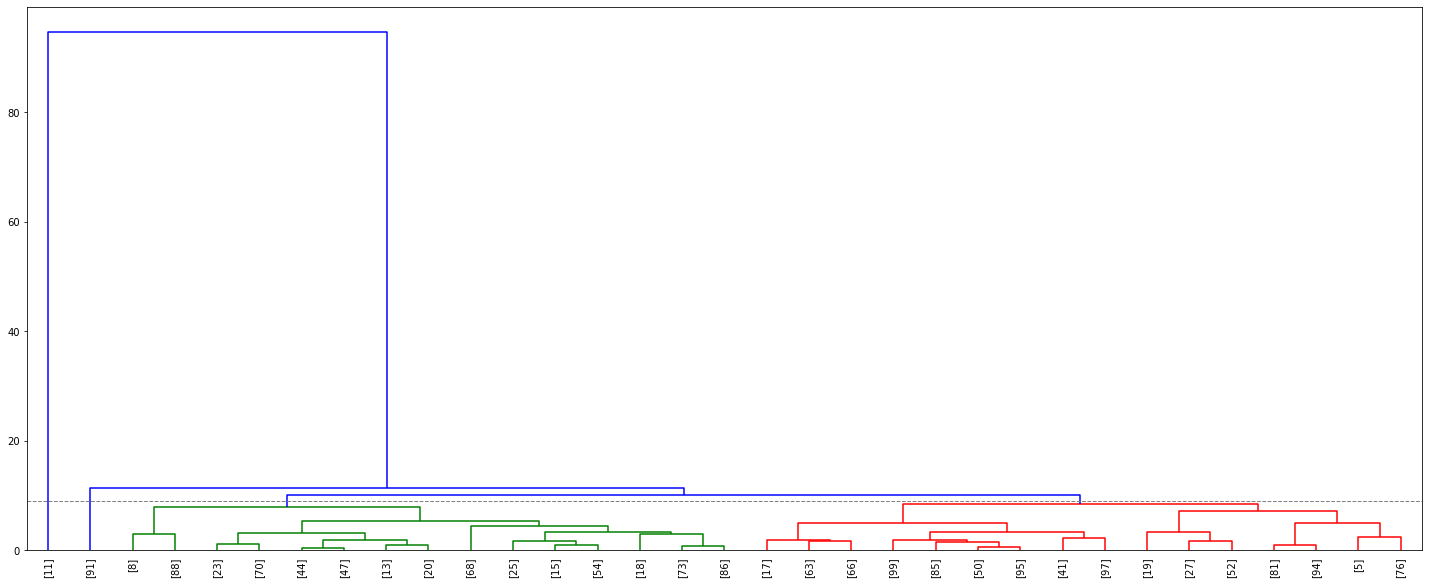

In [26]:
from scipy.cluster import hierarchy as sch
import matplotlib.pyplot as plt

fig = pylab.figure(figsize=(25, 10))
def llf(id):
    #return '[%s]' % (pdf['entidades'][id])
    return '[%s]' % (entidades.index[id])

dendro = sch.dendrogram(Z, leaf_label_func=llf, leaf_rotation=90, leaf_font_size =10, orientation = 'top', color_threshold=10)
plt.axhline(y=9, c='grey', lw=1, linestyle='dashed')
plt.show()

In [27]:
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[ 0.          2.42497992 16.74802498 ...  1.40501749  1.25931696
   1.72756347]
 [ 2.42497992  0.         16.91143259 ...  2.04075152  2.05823524
   2.2735259 ]
 [16.74802498 16.91143259  0.         ... 17.75012323 17.76318923
  18.22827802]
 ...
 [ 1.40501749  2.04075152 17.75012323 ...  0.          0.93559644
   0.6276708 ]
 [ 1.25931696  2.05823524 17.76318923 ...  0.93559644  0.
   0.80401553]
 [ 1.72756347  2.2735259  18.22827802 ...  0.6276708   0.80401553
   0.        ]]


In [28]:
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
agglom = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(feature_mtx)
agglom.labels_

array([2, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0])

In [29]:
entidades['cluster_'] = agglom.labels_
entidades.head(10)

,cant_hombres,cant_mujeres,nivelsecundaria,nivelpregrado,nivelposgrado,edadmenor50,edadmayor50,explaboralhasta30,explaboralmayor30,salario,region,cluster_
cod_departamento,,,,,,,,,,,,
5,43.064516,46.746278,25.395161,31.584367,22.629032,45.411911,44.395782,74.029156,15.781638,2.458650e+06,4.0,2
8,45.172345,47.905812,16.615230,25.587174,19.661323,46.358717,46.719439,87.378758,5.699399,2.336643e+06,0.0,0
11,381.274414,384.153846,224.021822,246.412439,277.561375,446.540098,318.877796,592.304965,173.123295,3.870479e+06,1.0,3
13,29.543228,30.824207,12.279539,15.670029,9.452450,32.351585,28.015850,56.024496,4.342939,2.050495e+06,0.0,0
15,13.284252,17.816535,7.810236,8.948031,8.466929,16.374016,14.726772,26.859843,4.240945,1.923741e+06,1.0,0
17,25.430020,26.807302,12.884381,16.628803,11.955375,26.103448,26.133874,44.555781,7.681542,2.320628e+06,4.0,2
18,23.492063,36.654762,15.750000,22.757937,9.535714,39.289683,20.857143,55.611111,4.535714,1.750457e+06,2.0,0
19,31.336364,35.183636,19.223636,15.856364,8.972727,32.865455,33.654545,60.398182,6.121818,2.021797e+06,5.0,2
20,19.047423,24.255670,8.505155,14.026804,8.496907,24.200000,19.103093,39.892784,3.410309,2.134137e+06,0.0,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'cant_hombres')

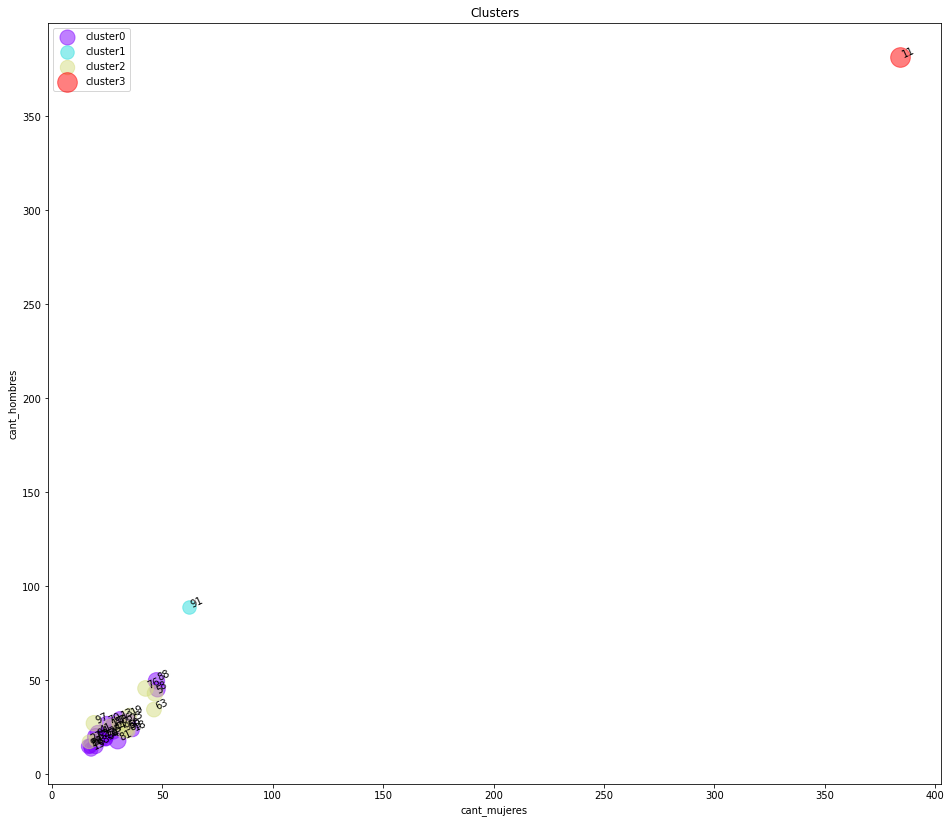

In [30]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Figura de tamaño 16 inches por 14 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = entidades[entidades.cluster_ == label]
    for i in subset.index:
            plt.text(subset.cant_mujeres[i], subset.cant_hombres[i], str(i), rotation=25) 
    plt.scatter(subset.cant_mujeres, subset.cant_hombres, s = subset.salario*0.0001, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('cant_mujeres')
plt.ylabel('cant_hombres')

In [31]:
departamento = df.query('cod_departamento == 91')
departamento.head(1).departamento

328    Amazonas
Name: departamento, dtype: object

In [32]:
filtered_df = df.query('cod_departamento != 11')
print ("Shape despues de quitar datos atipicos: ", filtered_df.shape)
filtered_df.head(2)

Shape despues de quitar datos atipicos:  (15699, 51)


,codigo,entidad,nit,orden,suborden,region,cod_departamento,departamento,cod_municipio,municipio,clasificacion,sector,nivel,tipo_vinculacion,naturaleza_juridica,longitud,latitud,año,mes,fuente,cant_hombres,cant_mujeres,cant_primaria,cant_secundaria,cant_tecnologico,cant_profesional,cant_especializacion,cant_maestria,cant_doctorado,cant_sindatos,menor29,30_39,40_49,50_62,63_mas,explaboral_1,explaboral_10,explaboral_20,explaboral_30,explaboral_40,explaboral_mas40,explaboral_sindatos,salario,totalpersonas,nivelsecundaria,nivelpregrado,nivelposgrado,edadmenor50,edadmayor50,explaboralhasta30,explaboralmayor30
1,992,ALCALDÍA DE SALDAÑA,800100140-4,Territorial,Municipal,2,73,Tolima,671,SALDAÑA,Ejecutiva,No Aplica,Central,Adscripción,Alcaldía,-75.017821,3.929018,2018,12,"Fuente: Función Pública, SIGEP diciembre 2018",9,21,0,5,3,5,1,0,0,16,1,9,11,7,2,11,10,3,5,0,1,0,2072607.63,30,5,8,1,21,9,29,1
3,4393,GOBERNACIÓN DE BOYACÁ,891800498-1,Territorial,Departamental,1,15,Boyacá,1,TUNJA,Ejecutiva,No Aplica,Central,Adscripción,Gobernación,-73.357557,5.544642,2021,6,junio 2021,193,246,4,61,28,92,199,40,1,11,3,58,81,252,45,12,62,59,159,76,71,0,4334771.62,439,65,120,240,142,297,292,147


In [33]:
filtered_df2 = filtered_df.query('cod_departamento != 91')
print ("Shape despues de quitar datos atipicos: ", filtered_df2.shape)
filtered_df2.head(3)

Shape despues de quitar datos atipicos:  (15654, 51)


,codigo,entidad,nit,orden,suborden,region,cod_departamento,departamento,cod_municipio,municipio,clasificacion,sector,nivel,tipo_vinculacion,naturaleza_juridica,longitud,latitud,año,mes,fuente,cant_hombres,cant_mujeres,cant_primaria,cant_secundaria,cant_tecnologico,cant_profesional,cant_especializacion,cant_maestria,cant_doctorado,cant_sindatos,menor29,30_39,40_49,50_62,63_mas,explaboral_1,explaboral_10,explaboral_20,explaboral_30,explaboral_40,explaboral_mas40,explaboral_sindatos,salario,totalpersonas,nivelsecundaria,nivelpregrado,nivelposgrado,edadmenor50,edadmayor50,explaboralhasta30,explaboralmayor30
1,992,ALCALDÍA DE SALDAÑA,800100140-4,Territorial,Municipal,2,73,Tolima,671,SALDAÑA,Ejecutiva,No Aplica,Central,Adscripción,Alcaldía,-75.017821,3.929018,2018,12,"Fuente: Función Pública, SIGEP diciembre 2018",9,21,0,5,3,5,1,0,0,16,1,9,11,7,2,11,10,3,5,0,1,0,2072607.63,30,5,8,1,21,9,29,1
3,4393,GOBERNACIÓN DE BOYACÁ,891800498-1,Territorial,Departamental,1,15,Boyacá,1,TUNJA,Ejecutiva,No Aplica,Central,Adscripción,Gobernación,-73.357557,5.544642,2021,6,junio 2021,193,246,4,61,28,92,199,40,1,11,3,58,81,252,45,12,62,59,159,76,71,0,4334771.62,439,65,120,240,142,297,292,147
5,1041,ALCALDÍA DE SAN JOSÉ DEL PALMAR,891680080-9,Territorial,Municipal,5,27,Chocó,660,SAN JOSÉ DEL PALMAR,Ejecutiva,No Aplica,Central,Adscripción,Alcaldía,-76.234333,4.895821,2018,12,"Fuente: Función Pública, SIGEP diciembre 2018",5,11,0,6,0,5,2,0,0,3,6,6,3,1,0,6,10,0,0,0,0,0,1705848.19,16,6,5,2,15,1,16,0


In [34]:
dfnew = pd.DataFrame(filtered_df2)

In [35]:
entidades = dfnew[['cant_hombres', 'cant_mujeres','cod_departamento','nivelsecundaria', 'nivelpregrado', 'nivelposgrado', 'edadmenor50', 'edadmayor50', 'explaboralhasta30', 'explaboralmayor30', 'salario', 'region']].groupby(by='cod_departamento').mean()
print(entidades.shape)
entidades

(31, 11)


,cant_hombres,cant_mujeres,nivelsecundaria,nivelpregrado,nivelposgrado,edadmenor50,edadmayor50,explaboralhasta30,explaboralmayor30,salario,region
cod_departamento,,,,,,,,,,,
5,43.064516,46.746278,25.395161,31.584367,22.629032,45.411911,44.395782,74.029156,15.781638,2.458650e+06,4.0
8,45.172345,47.905812,16.615230,25.587174,19.661323,46.358717,46.719439,87.378758,5.699399,2.336643e+06,0.0
13,29.543228,30.824207,12.279539,15.670029,9.452450,32.351585,28.015850,56.024496,4.342939,2.050495e+06,0.0
15,13.284252,17.816535,7.810236,8.948031,8.466929,16.374016,14.726772,26.859843,4.240945,1.923741e+06,1.0
17,25.430020,26.807302,12.884381,16.628803,11.955375,26.103448,26.133874,44.555781,7.681542,2.320628e+06,4.0
18,23.492063,36.654762,15.750000,22.757937,9.535714,39.289683,20.857143,55.611111,4.535714,1.750457e+06,2.0
19,31.336364,35.183636,19.223636,15.856364,8.972727,32.865455,33.654545,60.398182,6.121818,2.021797e+06,5.0
20,19.047423,24.255670,8.505155,14.026804,8.496907,24.200000,19.103093,39.892784,3.410309,2.134137e+06,0.0
23,28.014414,34.960360,15.052252,24.210811,8.614414,32.762162,30.212613,57.774775,5.200000,1.930009e+06,0.0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(entidades))
#print(scaler.mean_)
entidadesnormal = scaler.transform(entidades)
#entidadesnormal

StandardScaler()


In [37]:
feature_mtx = entidadesnormal
#feature_mtx

In [38]:
import scipy
from scipy.spatial import distance
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  after removing the cwd from sys.path.


In [39]:
import pylab
import scipy.cluster
Z = scipy.cluster.hierarchy.linkage(D, method='complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


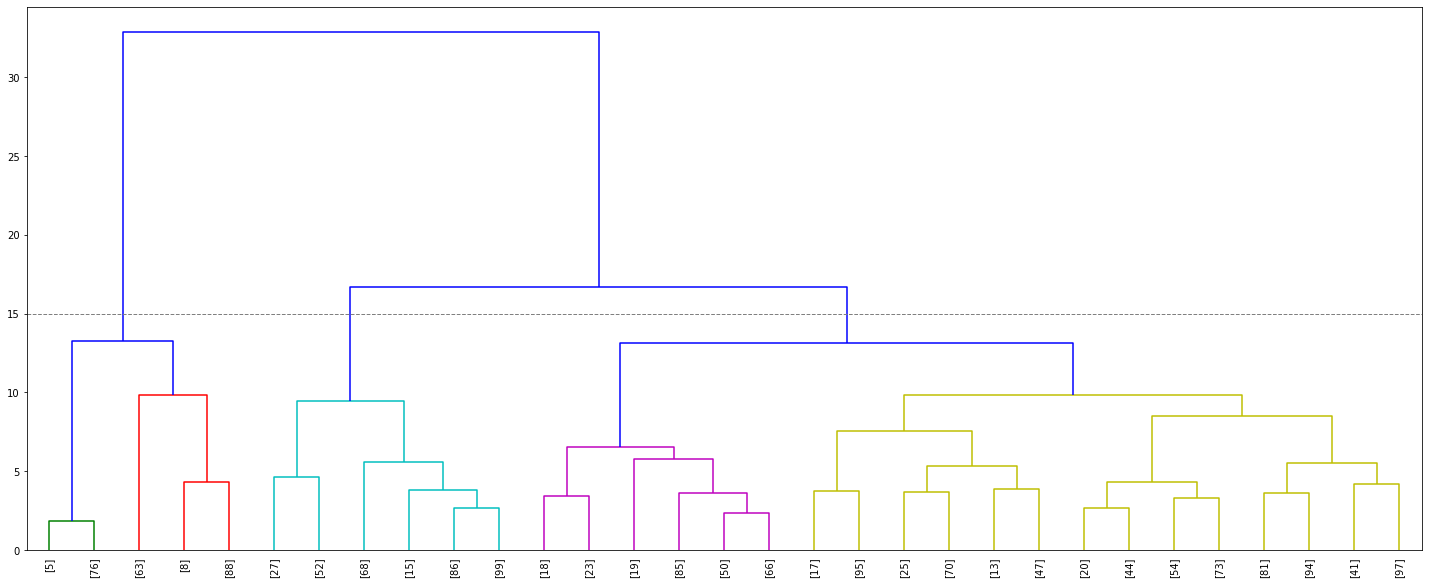

In [40]:
from scipy.cluster import hierarchy as sch
import matplotlib.pyplot as plt

fig = pylab.figure(figsize=(25, 10))
def llf(id):
    #return '[%s]' % (pdf['entidades'][id])
    return '[%s]' % (entidades.index[id])

dendro = sch.dendrogram(Z, leaf_label_func=llf, leaf_rotation=90, leaf_font_size =10, orientation = 'top', color_threshold=10)
plt.axhline(y=15, c='grey', lw=1, linestyle='dashed')
plt.show()

In [41]:
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
#print(dist_matrix)

In [42]:
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
agglom = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(feature_mtx)
agglom.labels_

array([0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 1])

In [43]:
entidades['cluster_'] = agglom.labels_
entidades

,cant_hombres,cant_mujeres,nivelsecundaria,nivelpregrado,nivelposgrado,edadmenor50,edadmayor50,explaboralhasta30,explaboralmayor30,salario,region,cluster_
cod_departamento,,,,,,,,,,,,
5,43.064516,46.746278,25.395161,31.584367,22.629032,45.411911,44.395782,74.029156,15.781638,2.458650e+06,4.0,0
8,45.172345,47.905812,16.615230,25.587174,19.661323,46.358717,46.719439,87.378758,5.699399,2.336643e+06,0.0,0
13,29.543228,30.824207,12.279539,15.670029,9.452450,32.351585,28.015850,56.024496,4.342939,2.050495e+06,0.0,2
15,13.284252,17.816535,7.810236,8.948031,8.466929,16.374016,14.726772,26.859843,4.240945,1.923741e+06,1.0,1
17,25.430020,26.807302,12.884381,16.628803,11.955375,26.103448,26.133874,44.555781,7.681542,2.320628e+06,4.0,2
18,23.492063,36.654762,15.750000,22.757937,9.535714,39.289683,20.857143,55.611111,4.535714,1.750457e+06,2.0,2
19,31.336364,35.183636,19.223636,15.856364,8.972727,32.865455,33.654545,60.398182,6.121818,2.021797e+06,5.0,2
20,19.047423,24.255670,8.505155,14.026804,8.496907,24.200000,19.103093,39.892784,3.410309,2.134137e+06,0.0,1
23,28.014414,34.960360,15.052252,24.210811,8.614414,32.762162,30.212613,57.774775,5.200000,1.930009e+06,0.0,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Experiencia laboral mayor 30')

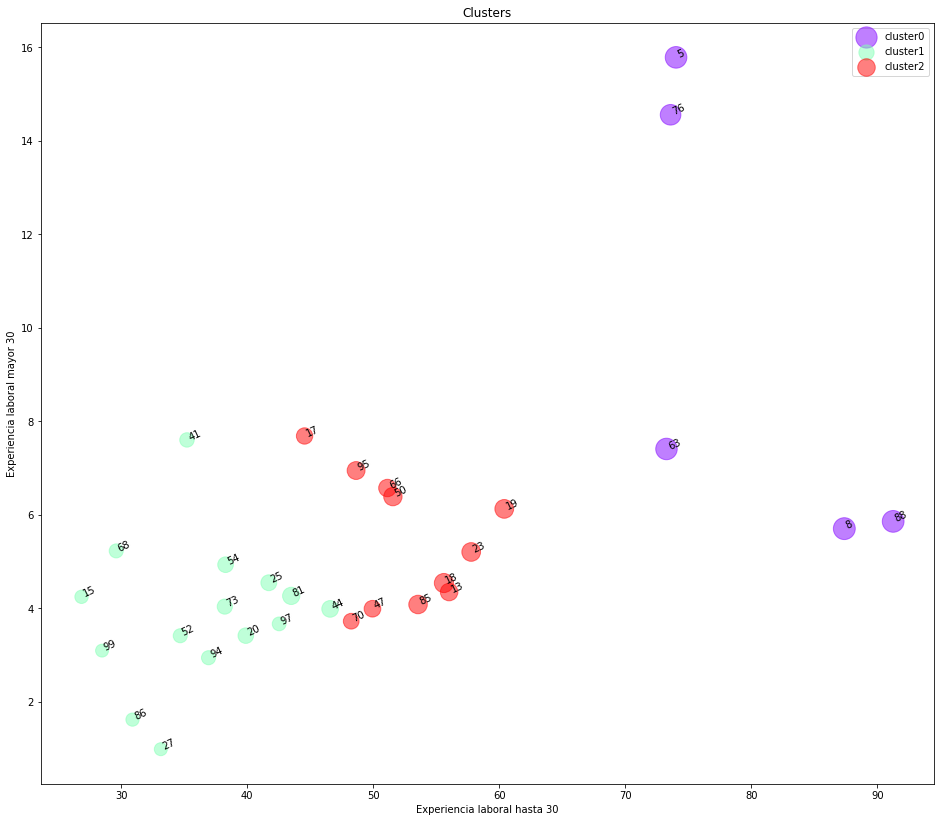

In [47]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Figura de tamaño 16 inches por 14 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = entidades[entidades.cluster_ == label]
    for i in subset.index:
            plt.text(subset.explaboralhasta30[i], subset.explaboralmayor30[i], str(i), rotation=25) 
    plt.scatter(subset.explaboralhasta30, subset.explaboralmayor30, s = subset.cant_mujeres*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Experiencia laboral hasta 30')
plt.ylabel('Experiencia laboral mayor 30')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Cant. Hombres')

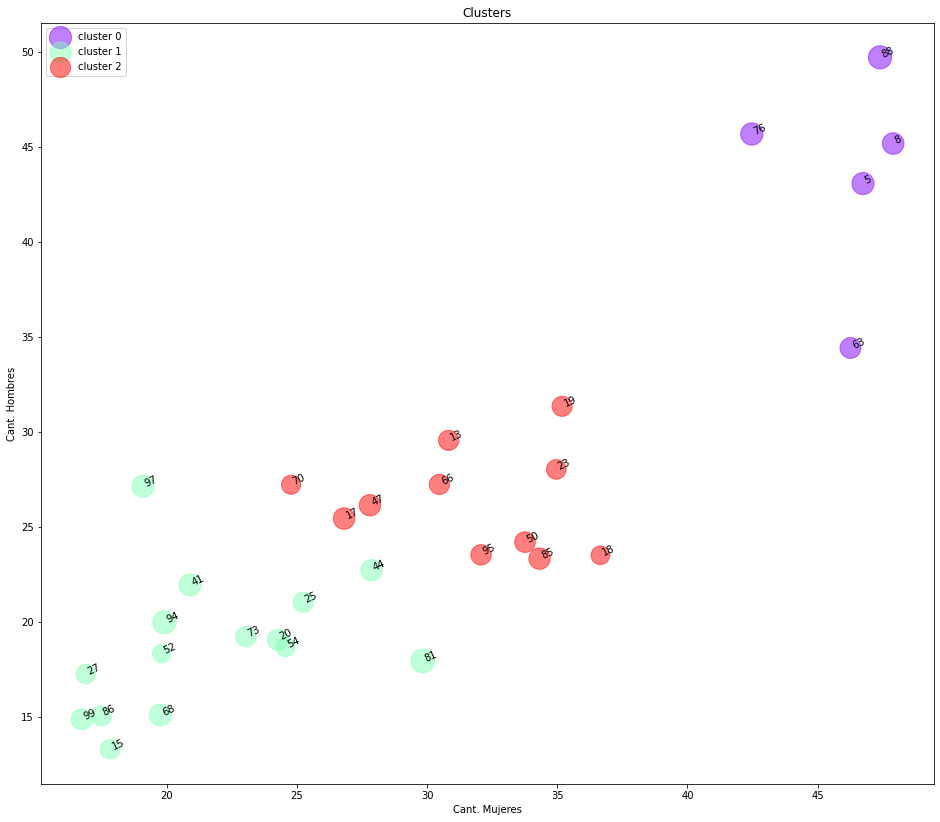

In [58]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Figura de tamaño 16 inches por 14 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = entidades[entidades.cluster_ == label]
    for i in subset.index:
            plt.text(subset.cant_mujeres[i], subset.cant_hombres[i], str(i), rotation=25) 
    plt.scatter(subset.cant_mujeres, subset.cant_hombres, s = subset.salario*0.0002, c=color, label='cluster '+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Cant. Mujeres')
plt.ylabel('Cant. Hombres')

Se presentan tres grupos ▶


*   Grupo 1: Se encuentran todos los departamentos con entidades de en promedio 51 o menos personas. En general, hay mas mujeres que hombres en los departamentos de este grupo. Es el grupo más grande. La experiencia laboral menor a 30 años va de 2 a 8 personas. 
*   Grupo 2: Se encuentran todos los departamentos con entidades de en promedio 52 y 66 personas. Los hombres se mantienen en un rango de 23 y 32 personas, y las mujeres en un rango de 25 y 37 personas. En este grupo, en la mayoria de casos, las mujeres tienen mayor proporcion que los hombres, ademas los hombres se mantienen casi constantes alrededor de 25, mientras la cantidad de mujeres tiene un rango mas grande. La experiencia laboral menor a 30 años va de 4 a 8 personas. 
*  Grupo 3: Se encuentran todos los departamentos con entidades de en promedio 80 personas o más. En este grupo la proporcion de hombres y mujeres se mantiene mas equilibrada. La experiencia laboral menor a 30 años va de 6 a 16 personas. 

**Conclusiones:**

- En cuanto a los salarios, para todos los grupos se mantienen constantes, con un ligero aumento en promedio para el grupo 3. 
- Además, los grupos estan conformados por departamentos de varias regiones, mostrando que no hay un comportamiento definido por región.
- En la mayoría de casos, en los tres grupos, la cantidad de mujeres es mayor, incluso para el dato atipico del departamento Bogota D.C (11)
- La cantidad de personas de experiencia menor y mayor a 30, es desproporcionada. Pero la cantidad de mujeres si aumenta, al aumentar el número de personas. 






